In [2]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import ode 
from scipy import integrate 
from scipy import signal
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import sys
import numpy as np

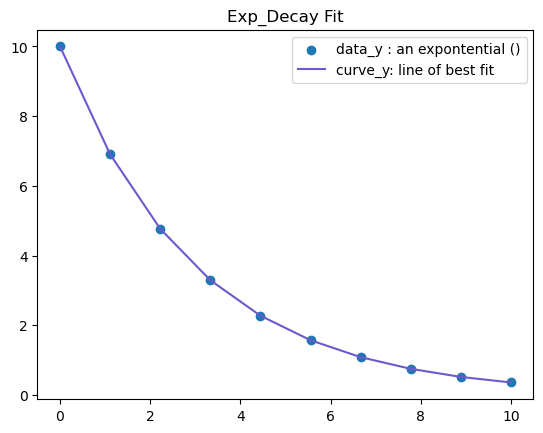

In [3]:
# For an expotential decay equation, the following can be used if looking to manually manipulate the parameters (amplitude and tau);
# however, in most cases we would computational compute the answers using curve fit. 
def exp_decay(x, amplitude, tau):  # Define a new function that will run an exponetial decay on the data provided
    return amplitude*np.exp(-x/tau)

x = np.linspace(0,10,10) # Length of x must match with length of data input **********
amplitude = 10
tau = 3

# Cannot just plot exp_decay equation. You have to apply some data to it 
# Right now, there is information only about the x-axis data (the time scale). You have to input now the y data information (i.e., concentration)
y = exp_decay(x, amplitude, tau)
# print(y)
# Imaginary data

#data_example = y + 0.5 * (np.random.random(len(y)) - 0.5)
plt.scatter(x, y, label = 'data_y : an expontential ()')
data = [1,2,3,4,5,6,7,8,9,10]
# data_y = y * data
#print(data)


# Run curve fit to output parameters 
#p0 = [0.5, 1]    # Don't think is necessary but maybe later 
parameters, stat_stuff = curve_fit(exp_decay, x, y) # HAVE to define two output variables to get correct amp. and tau 
# print(parameters)                      # There are three output parameters. We are only interested in columns 0 and 1 (amplitude and tau, respectively)
# print("amplitude = ", parameters[0])
# print( "tau = ", parameters[1])

# Create your line of best fit 
fit_data = exp_decay(x,*parameters) # Reuse the equation you used to calculate the curve ODEINT maybe and utilize the values output by curvefit
plt.plot(x, fit_data, label = 'curve_y: line of best fit', color = 'slateblue')
plt.title('Exp_Decay Fit')
plt.legend()

Text(0.5, 1.0, ' Irreversible reaction of A-B-C')

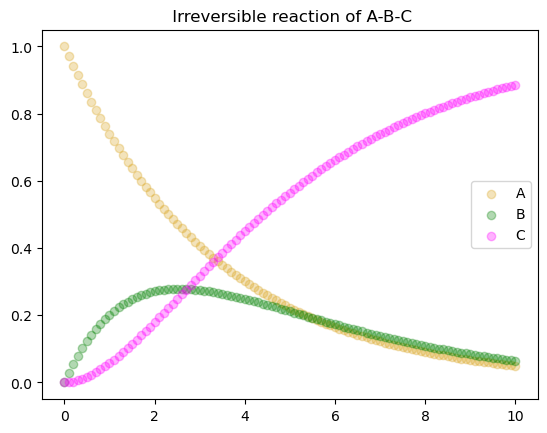

In [4]:
# Example of how to write rate equations 

# Reaction rates based on irreversible rxn
def f_concentration_change(y, t, k1, k2): 
    dA = - y[0]*k1                      
    dB = y[0]*k1 - y[1]*k2
    dC = y[1]*k2 
    return([dA, dB, dC])

def f_ode(t, k1, k2): 
    constants = (k1,k2)
    y_data = odeint(f_concentration_change, y0, t, args=constants)
    return y_data

k1 = 0.3
k2 = 0.5
y0 = [1,0,0] 
t = np.linspace(0,10,101) # Generation of an x-axis (here, t = time) based on random assignment via. numpy.linspace()
y = f_ode(t, k1, k2) # The total output by f_ode
plt.scatter(t, y[:,0], label = 'A', color = 'goldenrod', alpha=0.3) # Return only the first [:,0] column, A, that will be output via f_ode
plt.scatter(t, y[:,1], label = 'B', color = 'green', alpha=0.3) # Alpha indicates the level of intensity the colors will be. On a scale of 0.0-1.0
plt.scatter(t, y[:,2], label = 'C', color = 'magenta', alpha=0.3) 
plt.legend()
plt.title(' Irreversible reaction of A-B-C')

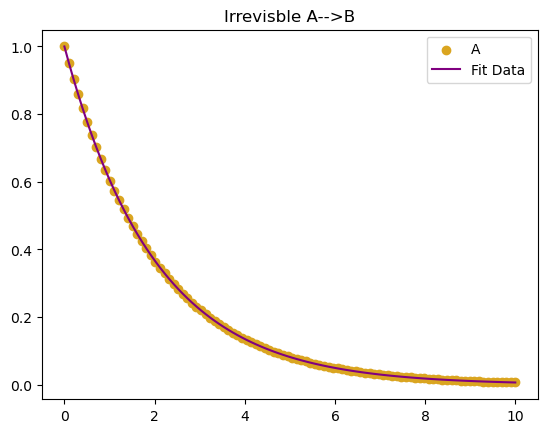

In [5]:
# Basic template. A--> B where we are looking at the decay rate of A

# Function to quantify change in concentrations over time 
# dependant on defiend rate constants in an irreversible rxn

def f_concentration_change(y,t,k1): 
    dA = - y[0] * k1
    return([dA])

def f_ode(t,y0, k1): 
    constants = (k1,)
    y_data = odeint(f_concentration_change, y0, t, args=constants)
    return y_data[:,0]

# initial_guess = 0.5, 0.3  # initial guess of rate constants for parameters in curve fit
k1 = 0.5
y0 = [1] # Starting concentration of all componetns in equation. A starts at 1. B starts at 0
t = np.linspace(0,10,100) # x_data. Time frame and number of points within 
y = f_ode(t, y0, k1)
plt.scatter(t, y, label = 'A', color = 'goldenrod', alpha=1) 

# Now for curve fitting the ODE, 
parameters, stats = curve_fit(f_ode, t, y)
amplitude = parameters[0]
tau = parameters[1]

fit = f_ode(t, *parameters)

plt.figure
plt.plot(t, fit, label ='Fit Data', color = 'purple')
plt.title('Irrevisble A-->B')
plt.legend()


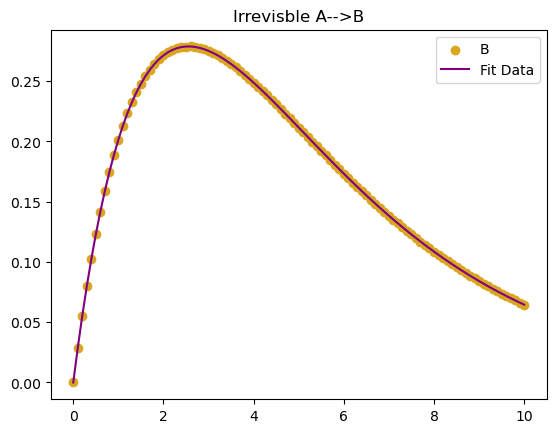

In [6]:
def f_concentration_change(y, t, k1, k2): 
    dA = - y[0]*k1                      # Reaction rates based on irreversible rxn
    dB = y[0]*k1 - y[1]*k2
    dC = y[1]*k2                        # C must be defined as it is the stopping point for B (required by curve_fit)
    return([dA, dB, dC])

def f_ode(t, k1, k2): 
    constants = (k1,k2)
    y_data = odeint(f_concentration_change, y0, t, args=constants)
    return y_data[:,1]

k1 = 0.3
k2 = 0.5
y0 = [1,0,0] 
t = np.linspace(0,10,101) 
y = f_ode(t, k1, k2)
plt.scatter(t, y, label = 'B', color = 'goldenrod', alpha=1) 

#Now for curve fitting the ODE, 
parameters, stats = curve_fit(f_ode, t, y)
amplitude = parameters[0]
tau = parameters[1]

fit = f_ode(t, *parameters)

plt.figure
plt.plot(t, fit, label ='Fit Data', color = 'purple')
plt.title('Irrevisble A-->B')
plt.legend()

Text(0.5, 1.0, ' Irreversible reaction of A-B-C')

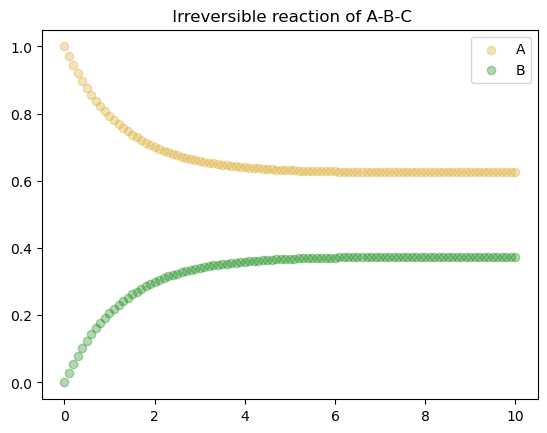

In [8]:
def f_concentration_change(y,t,k1,k2):         # Function to quantify change in concentrations over time dependant on defiend rate constants 
                                               # Because this is a reversible rxn, you must take into consideration both rate constants for it to occur 
    dA = -1*k1*y[0] + k2*y[1] # Becauase it depdns on one another, sum all the rate constant + components 
                                               # The rates are added because the -1 initiator in the 1st half is cancelled out in the 2nd 
    dB = -dA       # Because B depends only on A, it is the inverse of A's dependancy on itself and B ...                       # HAVE TO HAVE A C. Have to end an end point for the reaction. 
    return ([dA,dB]) 

def f_ode(t, k1, k2): 
    constants = (k1,k2)
    y_data = odeint(f_concentration_change, y0, t, args=constants)
    return y_data

k1 = 0.3
k2 = 0.5
k3 = 0.2
y0 = [1,0] 
t = np.linspace(0,10,101) 
y = f_ode(t, k1, k2)

plt.scatter(t, y[:,0], label = 'A', color = 'goldenrod', alpha=0.3) 
plt.scatter(t, y[:,1], label = 'B', color = 'green', alpha=0.3) 
#lt.scatter(t, y[:,2], label = 'C', color = 'magenta', alpha=0.3)       
plt.legend()
plt.title(' Irreversible reaction of A-B-C')

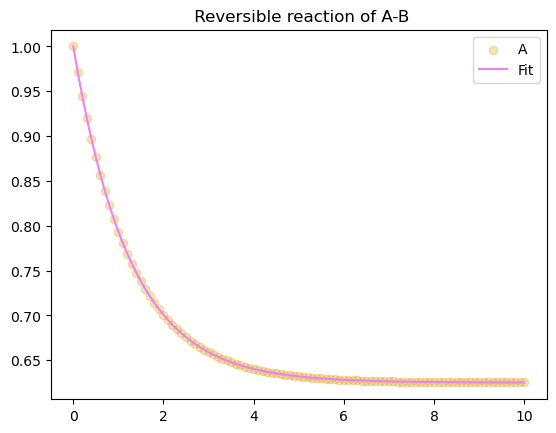

In [10]:
def f_concentration_change(y,t,k1,k2):         # Function to quantify change in concentrations over time dependant on defiend rate constants 
                                               # Because this is a reversible rxn, you must take into consideration both rate constants for it to occur 
    dA = -1*k1*y[0] + k2*y[1] # Becauase it depdns on one another, sum all the rate constant + components 
                                               # The rates are added because the -1 initiator in the 1st half is cancelled out in the 2nd 
    dB = -dA       # Because B depends only on A, it is the inverse of A's dependancy on itself and B ...                       # HAVE TO HAVE A C. Have to end an end point for the reaction. 
    return ([dA,dB]) 

def f_ode(t, k1, k2): 
    constants = (k1,k2)
    y_data = odeint(f_concentration_change, y0, t, args=constants)
    return y_data[:,0]

k1 = 0.3
k2 = 0.5
k3 = 0.2
y0 = [1,0] 
t = np.linspace(0,10,101) 
y = f_ode(t, k1, k2)
plt.scatter(t, y, label = 'A', color = 'goldenrod', alpha=0.3)    
plt.title(' Reversible reaction of A-B')


parameters, stats = curve_fit(f_ode, t, y)
fit = f_ode(t, *parameters)

plt.plot(t, fit, label = 'Fit', color = 'violet')

plt.legend()

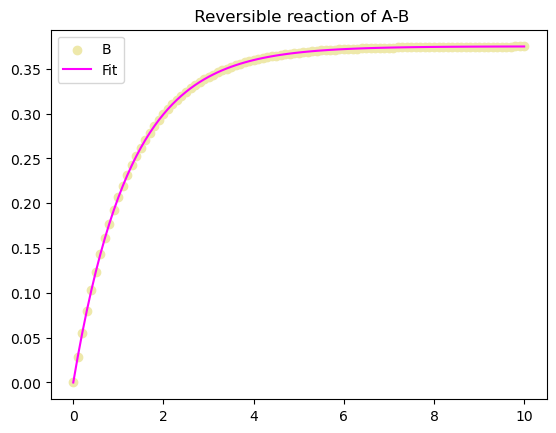

In [11]:
def f_concentration_change(y,t,k1,k2):         # Function to quantify change in concentrations over time dependant on defiend rate constants 
                                               # Because this is a reversible rxn, you must take into consideration both rate constants for it to occur 
    dA = -1*k1*y[0] + k2*y[1] # Becauase it depdns on one another, sum all the rate constant + components 
                                               # The rates are added because the -1 initiator in the 1st half is cancelled out in the 2nd 
    dB = -dA       # Because B depends only on A, it is the inverse of A's dependancy on itself and B ...                       # HAVE TO HAVE A C. Have to end an end point for the reaction. 
    return ([dA,dB]) 

def f_ode(t, k1, k2): 
    constants = (k1,k2)
    y_data = odeint(f_concentration_change, y0, t, args=constants)
    return y_data[:,1]

k1 = 0.3
k2 = 0.5
y0 = [1,0] 
t = np.linspace(0,10,101) 
y = f_ode(t, k1, k2)

plt.scatter(t, y, label = 'B', color = 'palegoldenrod') 
#plt.scatter(t, y[:,1], label = 'B', color = 'green', alpha=0.3) 
#plt.scatter(t, y[:,2], label = 'C', color = 'magenta', alpha=0.3)       
plt.title(' Reversible reaction of A-B')

parameters, stats = curve_fit(f_ode, t, y)
fit = f_ode(t, *parameters)
plt.plot(t, fit, label = 'Fit', color = 'fuchsia')
plt.legend()

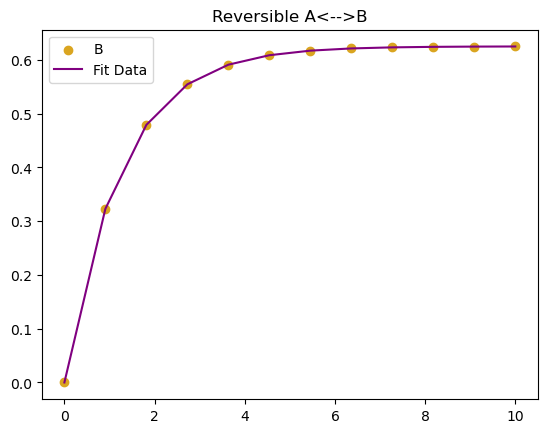

In [12]:
# A --> B

def f_concentration_change(y,t,k1,k2):         # Function to quantify change in concentrations over time dependant on defiend rate constants 
                                               # Because this is a reversible rxn, you must take into consideration both rate constants for it to occur 
    dA = -1*k1*y[0] + k2*y[1] # Becauase it depdns on one another, sum all the rate constant + components 
                                               # The rates are added because the -1 initiator in the 1st half is cancelled out in the 2nd 
    dB =  k1*y[0] - k2*y[1]       # Because B depends only on A, it is the inverse of A's dependancy on itself and B ...
    dC = k2*y[1]                  # HAVE TO HAVE A C. Have to end an end point for the reaction. 
    return ([dA,dB,dC]) 

def f_ode(t, k1, k2): 
    constants = (k1,k2)
    y_data = odeint(f_concentration_change, y0, t, args=constants)
    return y_data[:,1]

constants = (k1,k2)
k1 = 0.5
k2 = 0.3
y0 = [1,0,0] 
t = np.linspace(0,10,12) 
y = f_ode(t, k1, k2)
plt.scatter(t, y, label = 'B', color = 'goldenrod', alpha=1) 
plt.title('Reversible A<-->B')
plt.legend()

# Now for curve fitting the ODE, 
initial_guess = [0.5, 0.3]
parameter_names = ['k1', 'k2']

#p0 = [k1, k2]
p0=[0.5, 1]
parameters, stats = curve_fit(f_ode, t, y)
amplitude = parameters[0]
tau = parameters[1]

fit = f_ode(t, *parameters)

plt.figure
plt.plot(t, fit, label ='Fit Data', color = 'purple')
plt.legend()

In [ ]:
print()

In [ ]:
# def ode_ex_f2_1(t, k1, k2):
# #     print(params)
#     y_data= ode_ex_f2(t, k1, k2)
#     return y_data[:,1]

# test = ode_ex_f2_1(t, k1, k2)   #Test of the function above

# k1 = 0.5             
# k2 = 0.3             
# y0 = [1,0]

# x_values = np.linspace(0,.1,101)
# y_values = test[:,1] + 0.1 *( np.random.random(len(x_values)) - 0.5)

# plt.figure()

# plt.scatter(x_values, y_values, label = 'test + noise')

# for y0 in [[1,0], [2,0], [3,0]]:
#     p0 = [0.5, 1.0]
#     parameters, stats_stuff = curve_fit(ode_ex_f2_1, x_values, y_values, p0 = p0)
#     print(parameters)
#     fit_y = ode_ex_f2_1(x_values, *parameters)
#     plt.plot(x_values, fit_y, label = "y0=" + str(y0))
    
# plt.title('ODE Fit')
# plt.legend()